[![Roboflow Notebooks](https://ik.imagekit.io/roboflow/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# Fast Segment Anything Model (FastSAM)

---

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/CASIA-IVA-Lab/FastSAM)
[![arXiv](https://img.shields.io/badge/arXiv-2306.12156-b31b1b.svg)](https://arxiv.org/pdf/2306.12156.pdf)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/yHNPyqazYYU)
[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-use-fastsam)

The Fast Segment Anything Model (FastSAM) is a CNN Segment Anything Model trained by only 2% of the SA-1B dataset published by SAM authors.

![fast-segment-anything-model-figure-1](https://media.roboflow.com/notebooks/examples/fast-sam-figure-1.png)

The FastSAM authors claim it achieves comparable performance to the SAM method at 50 times the speed.

![fast-segment-anything-model-figure-2](https://media.roboflow.com/notebooks/examples/fast-sam-figure-2.png)

## Complementary Materials Covering SAM

---

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/facebookresearch/segment-anything)
[![arXiv](https://img.shields.io/badge/arXiv-2304.02643-b31b1b.svg)](https://arxiv.org/abs/2304.02643)
[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/how-to-segment-anything-with-sam.ipynb)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/D-D6ZmadzPE)
[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-use-segment-anything-model-sam)

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install FastSAM, SAM, and other dependencies
- Download FastSAM and SAM weights
- Download example data
- Imports
- Load FastSAM
- FastSAM inference
- FastSAM box prompt inference
- FastSAM point prompt inference
- FastSAM text prompt inference
- SAM vs FastSAM
- Roboflow benchmark dataset

## 🔥 Let's begin!

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [2]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [3]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /content


## Install FastSAM, SAM, and other dependencies

In [4]:
%cd {HOME}

# install FastSAM
!git clone https://github.com/CASIA-IVA-Lab/FastSAM.git
!pip -q install -r FastSAM/requirements.txt
# install CLIP
!pip -q install git+https://github.com/openai/CLIP.git
# install SAM
!pip -q install git+https://github.com/facebookresearch/segment-anything.git
# install other dependencies
!pip -q install roboflow supervision jupyter_bbox_widget

/content
Cloning into 'FastSAM'...
remote: Enumerating objects: 1329, done.
remote: Counting objects: 100% (494/494), done.
remote: Compressing objects: 100% (155/155), done.
remote: Total 1329 (delta 377), reused 399 (delta 338), pack-reused 835
Receiving objects: 100% (1329/1329), 72.57 MiB | 32.34 MiB/s, done.
Resolving deltas: 100% (530/530), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Download FastSAM and SAM weights

In [5]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://huggingface.co/spaces/An-619/FastSAM/resolve/main/weights/FastSAM.pt
!wget -P {HOME}/weights -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
!ls -lh {HOME}/weights

total 2.6G
-rw-r--r-- 1 root root 139M Jun 20  2023 FastSAM.pt
-rw-r--r-- 1 root root 2.4G Apr  4  2023 sam_vit_h_4b8939.pth


In [7]:
FAST_SAM_CHECKPOINT_PATH = f"{HOME}/weights/FastSAM.pt"
SAM_SAM_CHECKPOINT_PATH = f"{HOME}/weights/sam_vit_h_4b8939.pth"

## Download example data

**NONE:** Let's download few example images. Feel free to use your images or videos.

In [6]:
!mkdir -p {HOME}/data
!wget -P {HOME}/data -q https://media.roboflow.com/notebooks/examples/dog.jpeg
!wget -P {HOME}/data -q https://media.roboflow.com/notebooks/examples/robot.jpeg
!ls -lh {HOME}/data

total 532K
-rw-r--r-- 1 root root 104K Jun  2  2023 dog.jpeg
-rw-r--r-- 1 root root 426K Jul  5  2023 robot.jpeg


## Imports

**NOTE:** `FastSAM` code is not distributed via `pip` not it is packaged. Make sure to run code below from `{HOME}/FastSAM` directory. ⚠️

In [8]:
%cd {HOME}/FastSAM

import os
import cv2
import torch
import roboflow
import base64

import supervision as sv
import numpy as np

from roboflow import Roboflow
from fastsam import FastSAM, FastSAMPrompt
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

/content/FastSAM


## Load FastSAM

In [9]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"DEVICE = {DEVICE}")
fast_sam = FastSAM(FAST_SAM_CHECKPOINT_PATH)

DEVICE = cpu


## FastSAM inference

* `retina_masks=True` determines whether the model uses retina masks for generating segmentation masks.
* `imgsz=1024` sets the input image size to 1024x1024 pixels for processing by the model.
* `conf=0.4` sets the minimum confidence threshold for object detection.
* `iou=0.9` sets the minimum intersection over union threshold for non-maximum suppression to filter out duplicate detections.

In [84]:
IMAGE_PATH = f"{HOME}/data/WIN_20230917_13_32_27_Pro.jpg"

In [36]:
os.makedirs(f"{HOME}/output", exist_ok=True)

In [85]:
results = fast_sam(
    source=IMAGE_PATH,
    device=DEVICE,
    retina_masks=True,
    imgsz=1024,
    conf=0.4,
    iou=0.9)
prompt_process = FastSAMPrompt(IMAGE_PATH, results, device=DEVICE)
masks = prompt_process.everything_prompt()
# prompt_process.plot(annotations=masks, output=f"{HOME}/output")


image 1/1 /content/data/WIN_20230917_13_32_27_Pro.jpg: 576x1024 6 objects, 8689.8ms
Speed: 7.3ms preprocess, 8689.8ms inference, 68.6ms postprocess per image at shape (1, 3, 1024, 1024)


**NOTE:** `prompt_process.everything_prompt` returns `torch.Tensor` when DEVICE = 'cuda:0'. `prompt_process.everything_prompt` returns `numpy.ndarray` when DEVICE = 'cpu'.

In [86]:
# Convert masks to boolean (True/False)
def masks_to_bool(masks):
    if type(masks) == np.ndarray:
        return masks.astype(bool)
    return masks.cpu().numpy().astype(bool)

In [87]:
def annotate_image(image_path: str, masks: np.ndarray) -> np.ndarray:
    image = cv2.imread(image_path)

    xyxy = sv.mask_to_xyxy(masks=masks)
    detections = sv.Detections(xyxy=xyxy, mask=masks)

    mask_annotator = sv.MaskAnnotator(color_lookup = sv.ColorLookup.INDEX)
    return mask_annotator.annotate(scene=image.copy(), detections=detections)

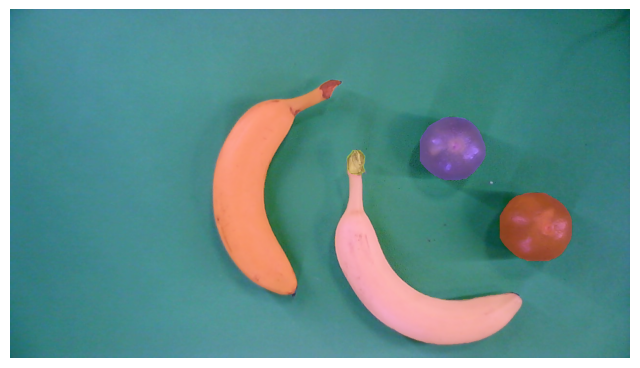

In [88]:
masks = masks_to_bool(masks)
annotated_image=annotate_image(image_path=IMAGE_PATH, masks=masks)
sv.plot_image(image=annotated_image, size=(8, 8))

**NOTE:** The quality of the generated masks is quite poor. Let's see if we can improve it by manipulating the parameters.

In [89]:
results = fast_sam(
    source=IMAGE_PATH,
    device=DEVICE,
    retina_masks=True,
    imgsz=1024,
    conf=0.5,
    iou=0.6)
prompt_process = FastSAMPrompt(IMAGE_PATH, results, device=DEVICE)
masks = prompt_process.everything_prompt()


image 1/1 /content/data/WIN_20230917_13_32_27_Pro.jpg: 576x1024 5 objects, 8605.7ms
Speed: 7.2ms preprocess, 8605.7ms inference, 56.9ms postprocess per image at shape (1, 3, 1024, 1024)


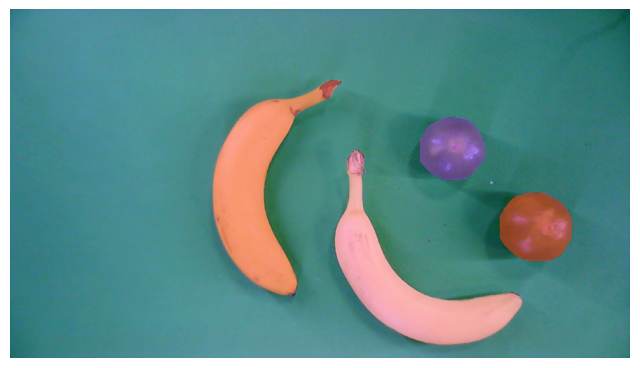

In [90]:
masks = masks_to_bool(masks)
annotated_image=annotate_image(image_path=IMAGE_PATH, masks=masks)
sv.plot_image(image=annotated_image, size=(8, 8))